In [12]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


In [2]:
data_path = "./fds-link-prediction-madhura/archive"

In [3]:
g = nx.read_edgelist(f"{data_path}/edges_train.edgelist", delimiter=',', nodetype=str)  
df_attributes = pd.read_csv(f"{data_path}/attributes.csv")
df_predictions = pd.read_csv(f"{data_path}/attributes.csv")
df_solutionInput = pd.read_csv(f"{data_path}/solutionInput.csv")

In [145]:
print(df_solutionInput.head())


   ID  int1  int2
0   0    56   396
1   1   760   853
2   2   340  1137
3   3   597   771
4   4  1355  1410


In [144]:
print(f"Number of edges: {g.number_of_edges()}")
print(f"Number of nodes: {g.number_of_nodes()}")
print(f"Number of atributes: {list(df_attributes.attribute.unique())}")

Number of edges: 6600
Number of nodes: 1500
Number of atributes: ['l', 'x', 'd', 'm', 'y', 'f']


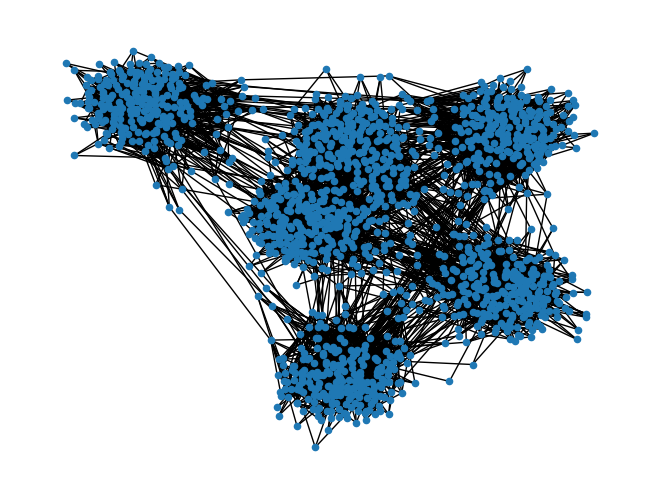

In [7]:
pos = nx.spring_layout(g)

# Draw the original graph
nx.draw(g, pos=pos, node_size=20)

In [14]:
from networkx.algorithms.community import greedy_modularity_communities

#the function will return a partition of nodes
c = list(greedy_modularity_communities(g, resolution=1.0))


#we can inspecte the first element of the partition (e.g., nodes on community 1)
sorted(c[0])

['339',
 '434',
 '435',
 '470',
 '496',
 '500',
 '501',
 '502',
 '503',
 '504',
 '505',
 '506',
 '507',
 '508',
 '509',
 '510',
 '511',
 '512',
 '513',
 '514',
 '515',
 '516',
 '517',
 '518',
 '519',
 '520',
 '521',
 '522',
 '523',
 '524',
 '525',
 '526',
 '527',
 '528',
 '529',
 '530',
 '531',
 '532',
 '533',
 '534',
 '535',
 '536',
 '537',
 '538',
 '539',
 '540',
 '541',
 '542',
 '543',
 '544',
 '545',
 '546',
 '547',
 '548',
 '549',
 '550',
 '551',
 '552',
 '553',
 '554',
 '555',
 '556',
 '557',
 '558',
 '559',
 '560',
 '561',
 '562',
 '563',
 '564',
 '565',
 '566',
 '567',
 '568',
 '569',
 '570',
 '571',
 '572',
 '573',
 '574',
 '575',
 '576',
 '577',
 '578',
 '579',
 '580',
 '581',
 '582',
 '583',
 '584',
 '585',
 '586',
 '587',
 '588',
 '589',
 '590',
 '591',
 '592',
 '593',
 '594',
 '595',
 '596',
 '597',
 '598',
 '599',
 '600',
 '601',
 '602',
 '603',
 '604',
 '605',
 '606',
 '607',
 '608',
 '609',
 '610',
 '612',
 '613',
 '614',
 '615',
 '616',
 '617',
 '618',
 '619',
 '620',


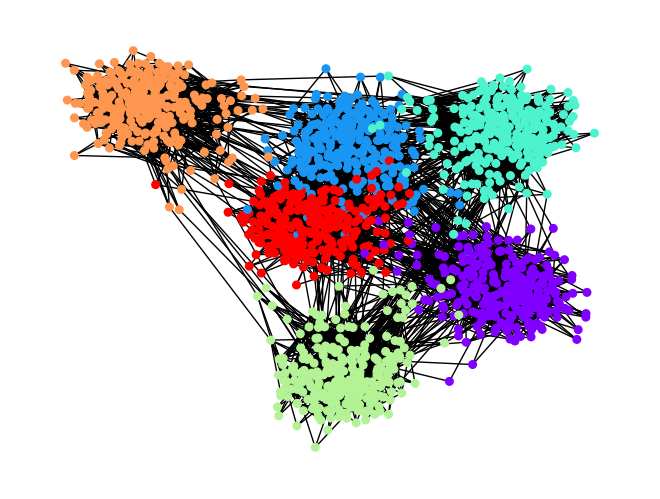

In [15]:
c_map = {}

for i, community in enumerate(c):
    for node in community:
        c_map[node] = i

nx.draw(g, pos, node_color=[c_map[node] for node in g.nodes()], cmap = plt.cm.rainbow, node_size=30)

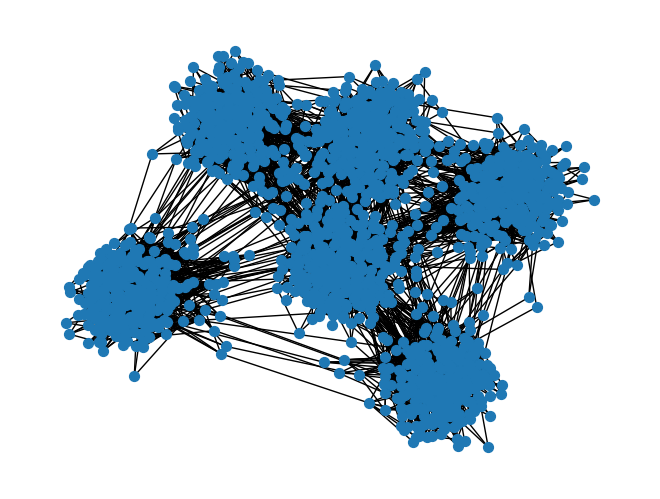

In [171]:
# This example can be useful for you to import the network data used in Assignment 2

edges = []
for edg in nx.edges(g):
    edges.append(edg)

dfEdges = pd.DataFrame(edges)
dfEdges.to_csv("assignment2.edgelist", index=False, header=False)

G1 = nx.read_edgelist("assignment2.edgelist", data=False, nodetype=int, delimiter=',')

pos_G1 = nx.spring_layout(G1)

nx.draw(G1, pos=pos_G1, node_size=50)

plt.show()

In [172]:
print(f"Number of edges: {G1.number_of_edges()}")
print(f"Number of nodes: {G1.number_of_nodes()}")
print(f"Number of atributes: {list(df_attributes.attribute.unique())}")

#We want to see how many edges and nodes we have so we can better know how many edges we want to remove for the training and test data.

Number of edges: 6600
Number of nodes: 1500
Number of atributes: ['l', 'x', 'd', 'm', 'y', 'f']
